In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten the images for machine learning algorithms
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values to range 0-1
x_train_flat = x_train_flat.astype('float32') / 255.0
x_test_flat = x_test_flat.astype('float32') / 255.0

# Standardize data for machine learning algorithms
scaler = StandardScaler()
x_train_ml = scaler.fit_transform(x_train_flat)
x_test_ml = scaler.transform(x_test_flat)

# Convert labels for machine learning algorithms
y_train_ml = y_train.flatten()
y_test_ml = y_test.flatten()

# Store results
results = {}

In [4]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_ml, y_train_ml)
y_pred_knn = knn.predict(x_test_ml)
results['KNN'] = accuracy_score(y_test_ml, y_pred_knn)

# Logistic Regression
logreg = LogisticRegression(max_iter=100)
logreg.fit(x_train_ml, y_train_ml)
y_pred_logreg = logreg.predict(x_test_ml)
results['Logistic Regression'] = accuracy_score(y_test_ml, y_pred_logreg)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_ml, y_train_ml)
y_pred_rf = rf.predict(x_test_ml)
results['Random Forest'] = accuracy_score(y_test_ml, y_pred_rf)

# Naive Bayes
nb = GaussianNB()
nb.fit(x_train_ml, y_train_ml)
y_pred_nb = nb.predict(x_test_ml)
results['Naive Bayes'] = accuracy_score(y_test_ml, y_pred_nb)

# K-Means Clustering
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(x_train_ml)
y_pred_kmeans = kmeans.predict(x_test_ml)
results['K-Means'] = accuracy_score(y_test_ml, y_pred_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Deep Learning: Convolutional Neural Network (CNN)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_cnn = to_categorical(y_train, 10)
y_test_cnn = to_categorical(y_test, 10)

# Build CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = cnn_model.fit(x_train, y_train_cnn, epochs=10, validation_data=(x_test, y_test_cnn), batch_size=64)

# Evaluate CNN model
cnn_accuracy = cnn_model.evaluate(x_test, y_test_cnn, verbose=0)[1]
results['CNN'] = cnn_accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.2639 - loss: 1.9526 - val_accuracy: 0.5061 - val_loss: 1.3774
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 80ms/step - accuracy: 0.4751 - loss: 1.4611 - val_accuracy: 0.5277 - val_loss: 1.2977
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.5404 - loss: 1.2963 - val_accuracy: 0.6013 - val_loss: 1.1311
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.5859 - loss: 1.1783 - val_accuracy: 0.6231 - val_loss: 1.0548
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.6162 - loss: 1.0964 - val_accuracy: 0.6642 - val_loss: 0.9656
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.6418 - loss: 1.0316 - val_accuracy: 0.6730 - val_loss: 0.9402
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.6685 - loss: 0.9507 - val_accuracy: 0.6894 - val_loss: 0.9033
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.6826 - loss: 0.9164 - 

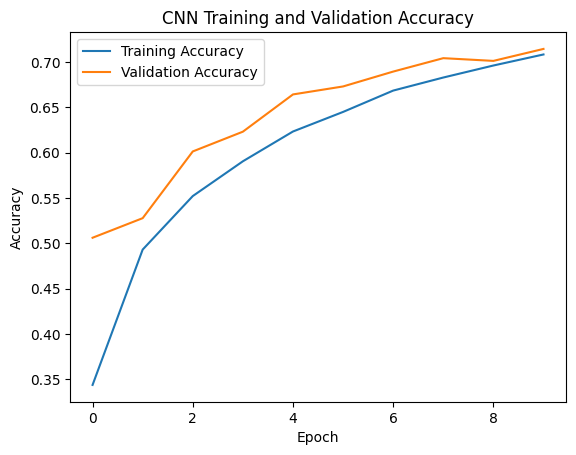

In [6]:
# Plot training and validation accuracy for CNN
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training and Validation Accuracy')
plt.show()

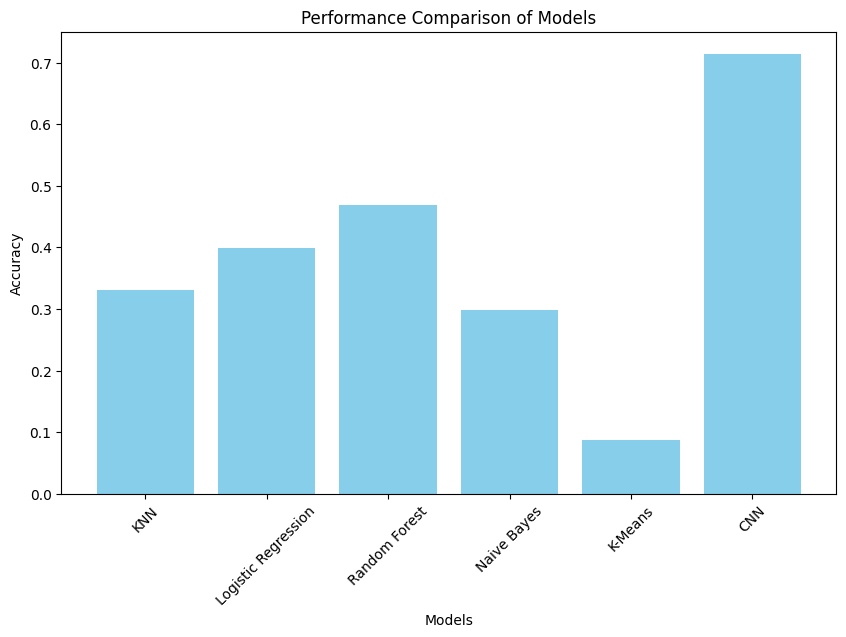

In [7]:
# Bar graph of model performances
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Models')
plt.xticks(rotation=45)
plt.show()

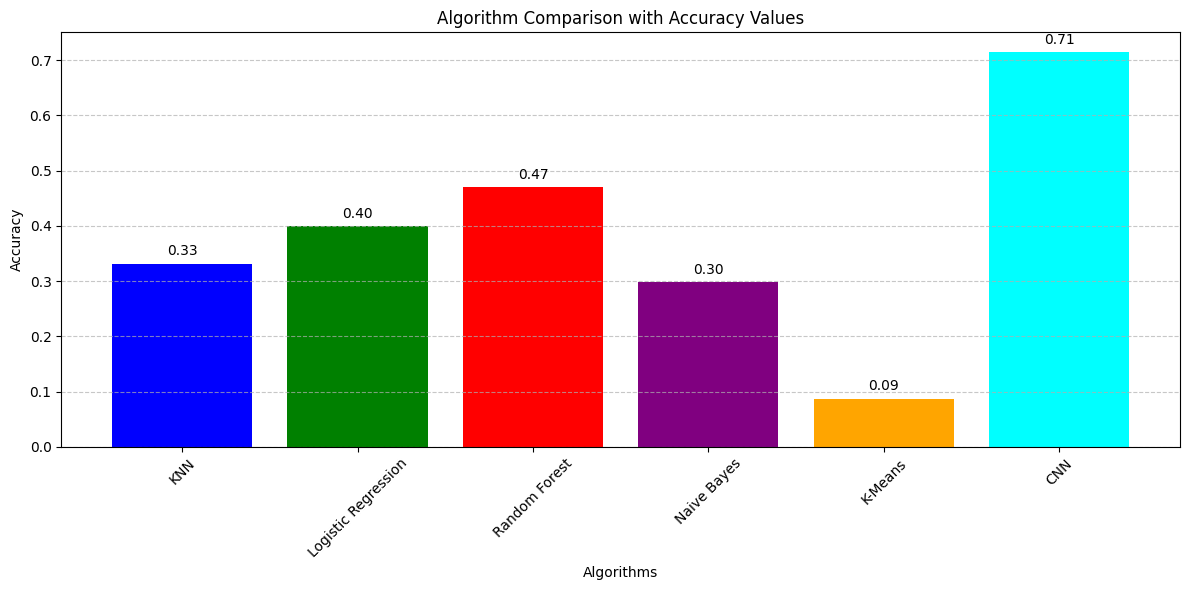

In [8]:
# Detailed comparison graph
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow']
models = list(results.keys())
accuracies = list(results.values())
plt.bar(models, accuracies, color=colors)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison with Accuracy Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
# Print results
print("\nModel Performance Comparison:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.2f}")


Model Performance Comparison:
KNN: 0.33
Logistic Regression: 0.40
Random Forest: 0.47
Naive Bayes: 0.30
K-Means: 0.09
CNN: 0.71


In [10]:
# Save the CNN model
cnn_model.save('cifar10_cnn_model.keras')
print("CNN model saved as cifar10_cnn_model.keras")

CNN model saved as cifar10_cnn_model.keras
